# Organize Data
get data looking the way we need without manually changing the file

In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import seaborn library for plots
import seaborn as sns
%matplotlib inline

In [2]:
#read in data and verify
names = ['Rank','Name', 'Platform', 'Year', 'Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df = pd.read_csv('vgsales2.csv', header=None,delim_whitespace=False,names=names,na_values='?')
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#drop all rows with empty slots
df = df.dropna()

In [6]:
df.shape

(16291, 11)

In [7]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [49]:
#drop all rows past 2015
df = df[df.Year < 2016]
df.shape

(15945, 11)

In [50]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [52]:
#display the values of the Publishers so that we can get a top 10
df.Publisher.value_counts()

Electronic Arts                           1319
Activision                                 952
Ubisoft                                    904
Namco Bandai Games                         888
Konami Digital Entertainment               815
THQ                                        712
Nintendo                                   686
Sony Computer Entertainment                677
Sega                                       622
Take-Two Interactive                       400
Capcom                                     358
Atari                                      346
Tecmo Koei                                 321
Disney Interactive Studios                 214
Square Enix                                211
Warner Bros. Interactive Entertainment     203
Midway Games                               196
Eidos Interactive                          196
505 Games                                  185
Microsoft Game Studios                     185
Acclaim Entertainment                      184
D3Publisher  

# Seperate data by platform
## Platforms: PS (PS,PS2,PS3), XB (XB & XB360), PC

In [8]:
dfXB = df[df.Platform == 'XB']

In [9]:
dfXB.shape

(803, 11)

In [10]:
dfXB.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
129,130,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
568,569,Fable,XB,2004.0,Role-Playing,Microsoft Game Studios,1.99,0.58,0.00,0.09,2.66
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49


In [11]:
dfX360 = df[df.Platform == 'X360']
dfX360.shape

(1234, 11)

In [12]:
dfX360.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51


In [13]:
dfPC = df[df.Platform == 'PC']
dfPC.shape

(938, 11)

In [14]:
dfPC.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.0,0.23,4.21


In [15]:
dfPS = df[df.Platform == 'PS']
dfPS.shape

(1189, 11)

In [16]:
dfPS.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
87,88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16


In [17]:
dfPS2 = df[df.Platform == 'PS2']
dfPS2.shape

(2127, 11)

In [18]:
dfPS2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
86,87,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05


In [19]:
dfPS3 = df[df.Platform == 'PS3']
dfPS3.shape

(1304, 11)

In [20]:
dfPS3.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


# Display Information
### platform vs sales, genre vs sales, publisher vs sales

#### Overall sales

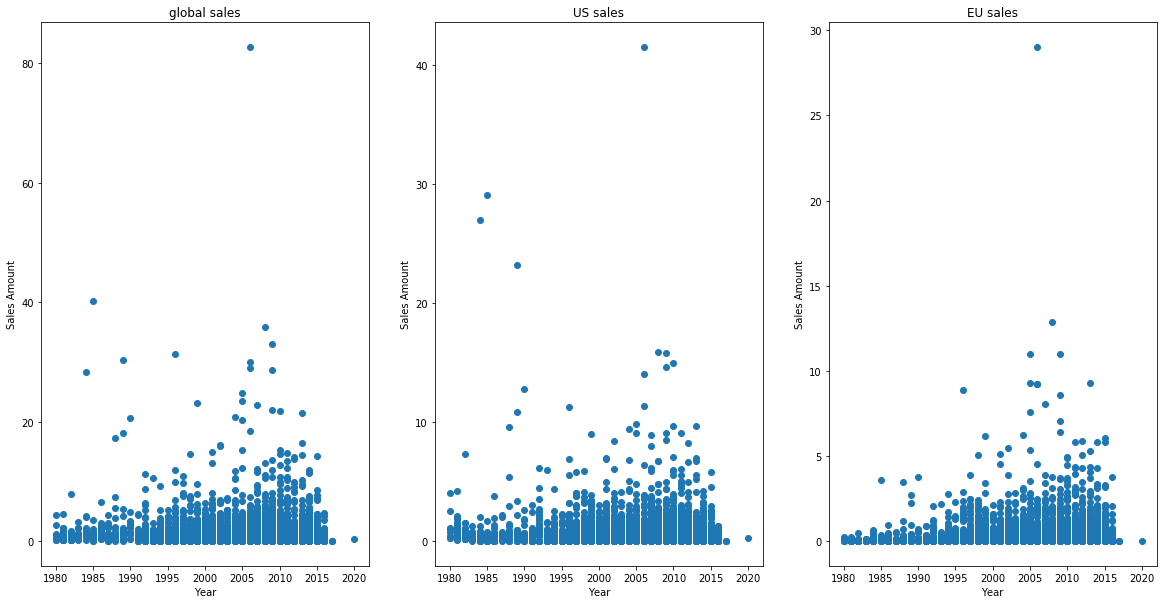

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(df['Year'],df['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("global sales")
plt.subplot(1,3,2)
plt.scatter(df['Year'],df['NA_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("US sales")
plt.subplot(1,3,3)
plt.scatter(df['Year'],df['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("EU sales")

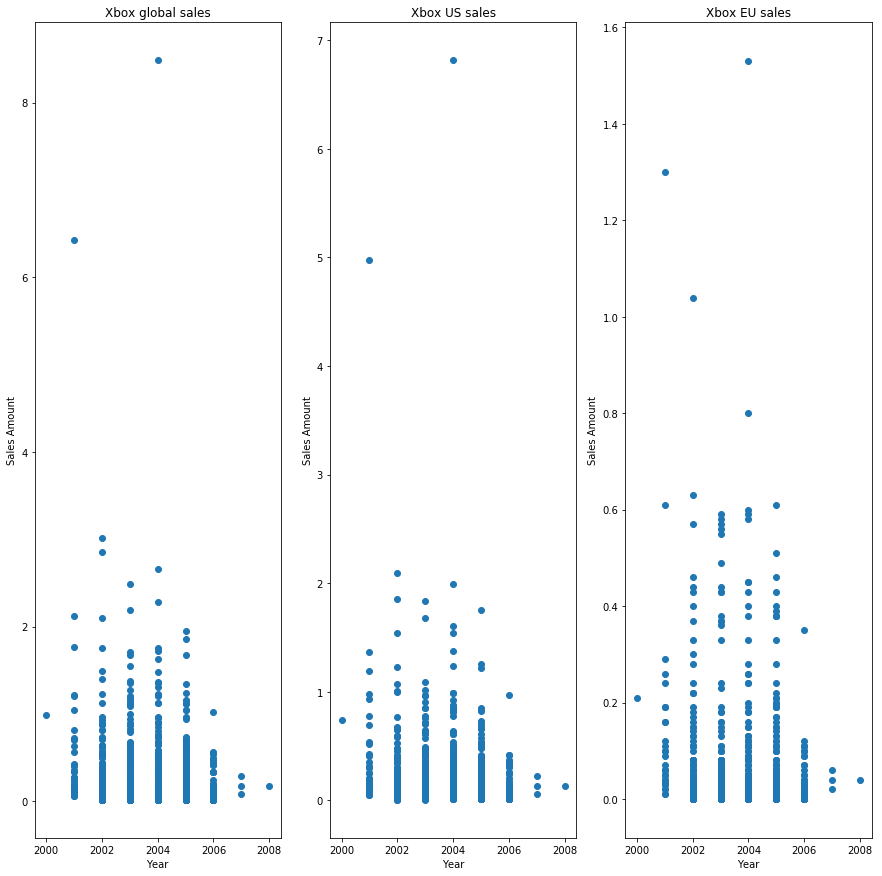

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.scatter(dfXB['Year'],dfXB['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox global sales")
plt.subplot(1,3,2)
plt.scatter(dfXB['Year'],dfXB['NA_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox US sales")
plt.subplot(1,3,3)
plt.scatter(dfXB['Year'],dfXB['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox EU sales")
plt.show()

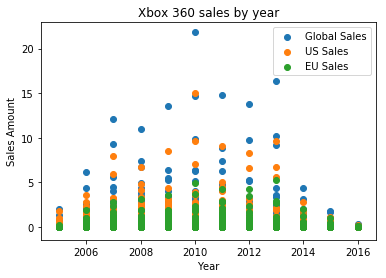

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.scatter(dfX360['Year'],dfX360['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox 360 sales by year")
plt.subplot(1,3,2)
plt.scatter(dfX360['Year'],dfX360['NA_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox 360 sales by year")
plt.subplot(1,3,3)
plt.scatter(dfX360['Year'],dfX360['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Xbox 360 sales by year")

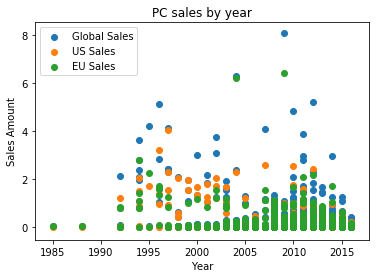

In [25]:
plt.scatter(dfPC['Year'],dfPC['Global_Sales'])
plt.scatter(dfPC['Year'],dfPC['NA_Sales'])
plt.scatter(dfPC['Year'],dfPC['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("PC sales by year")
plt.legend(["Global Sales","US Sales", "EU Sales"])

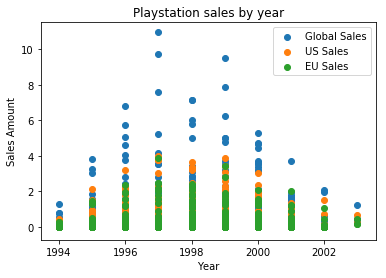

In [27]:
plt.scatter(dfPS['Year'],dfPS['Global_Sales'])
plt.scatter(dfPS['Year'],dfPS['NA_Sales'])
plt.scatter(dfPS['Year'],dfPS['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Playstation sales by year")
plt.legend(["Global Sales","US Sales", "EU Sales"])

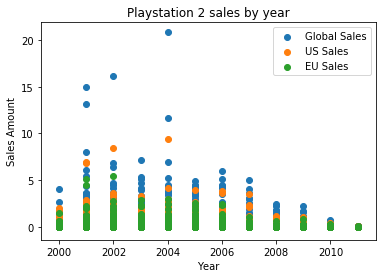

In [28]:
plt.scatter(dfPS2['Year'],dfPS2['Global_Sales'])
plt.scatter(dfPS2['Year'],dfPS2['NA_Sales'])
plt.scatter(dfPS2['Year'],dfPS2['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Playstation 2 sales by year")
plt.legend(["Global Sales","US Sales", "EU Sales"])

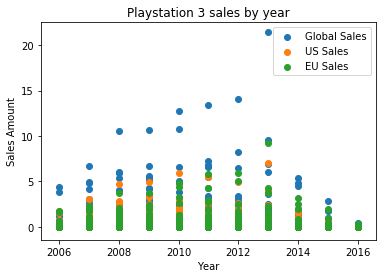

In [29]:
plt.scatter(dfPS3['Year'],dfPS3['Global_Sales'])
plt.scatter(dfPS3['Year'],dfPS3['NA_Sales'])
plt.scatter(dfPS3['Year'],dfPS3['EU_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title("Playstation 3 sales by year")
plt.legend(["Global Sales","US Sales", "EU Sales"])

### Group needed platforms and re-order

In [29]:
df2 = pd.concat([dfXB,dfX360,dfPC,dfPS,dfPS2,dfPS3])

In [30]:
df2.shape

(7595, 11)

In [48]:
df2 = df2.sort_values('Rank',ascending=True)
df2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98


### make categories into dummy variables

In [50]:
dummy_plat = pd.get_dummies(df2['Platform'])
df2.drop('Platform', axis=1)
df2 = df2.join(dummy_plat)
df2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PC,PS,PS2,PS3,X360,XB
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,0,0,0,0,1,0
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,0,0,0,1,0,0
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,0,0,1,0,0,0
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0,0,0,0,1,0
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,0,0,1,0,0,0
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,0,0,1,0,0,0


In [45]:
#put data into arrays for graphing
platform = np.array(df2['Platform'])
genre = np.array(df2['Genre'])
publisher = np.array(df2['Publisher'])
US = np.array(df2['NA_Sales'])
EU = np.array(df2['EU_Sales'])
Global = np.array(df2['Global_Sales'])
year = np.array(df2['Year'])

In [36]:
#import seaborn library for plots
import seaborn as sns

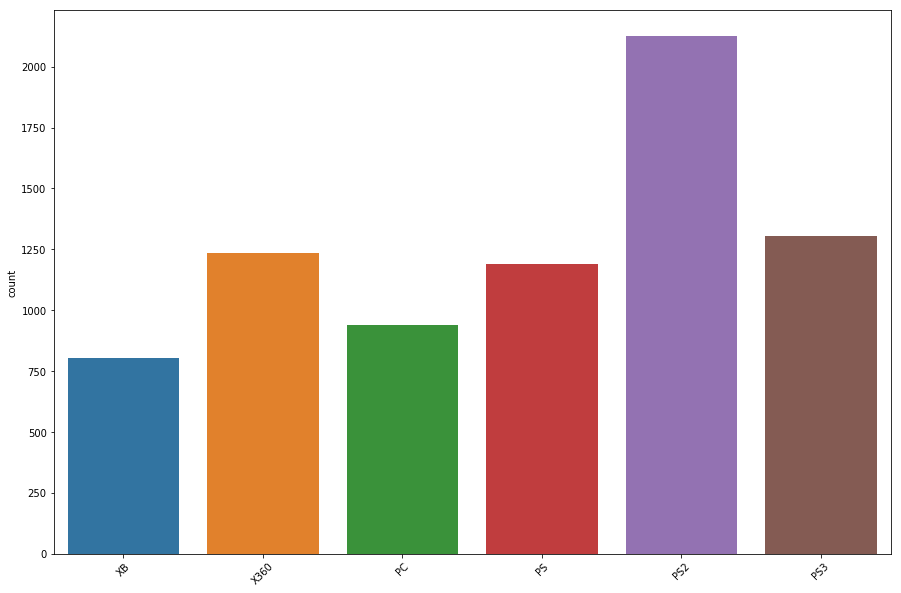

In [37]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(platform)

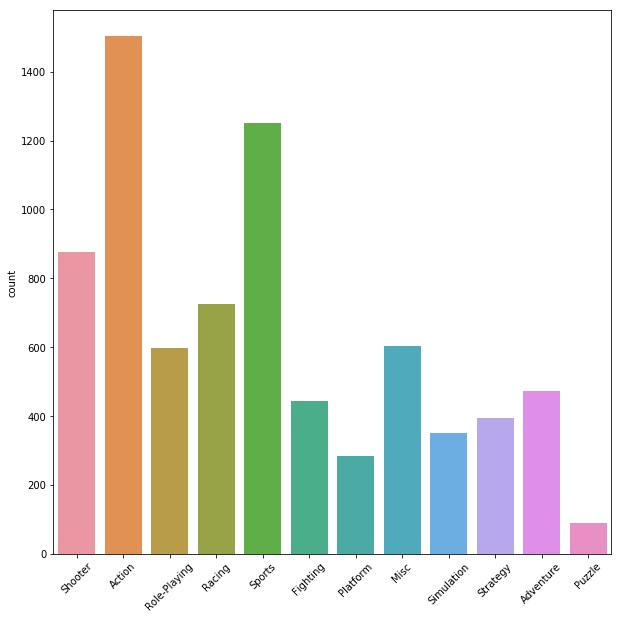

In [38]:
#display genre
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(genre)

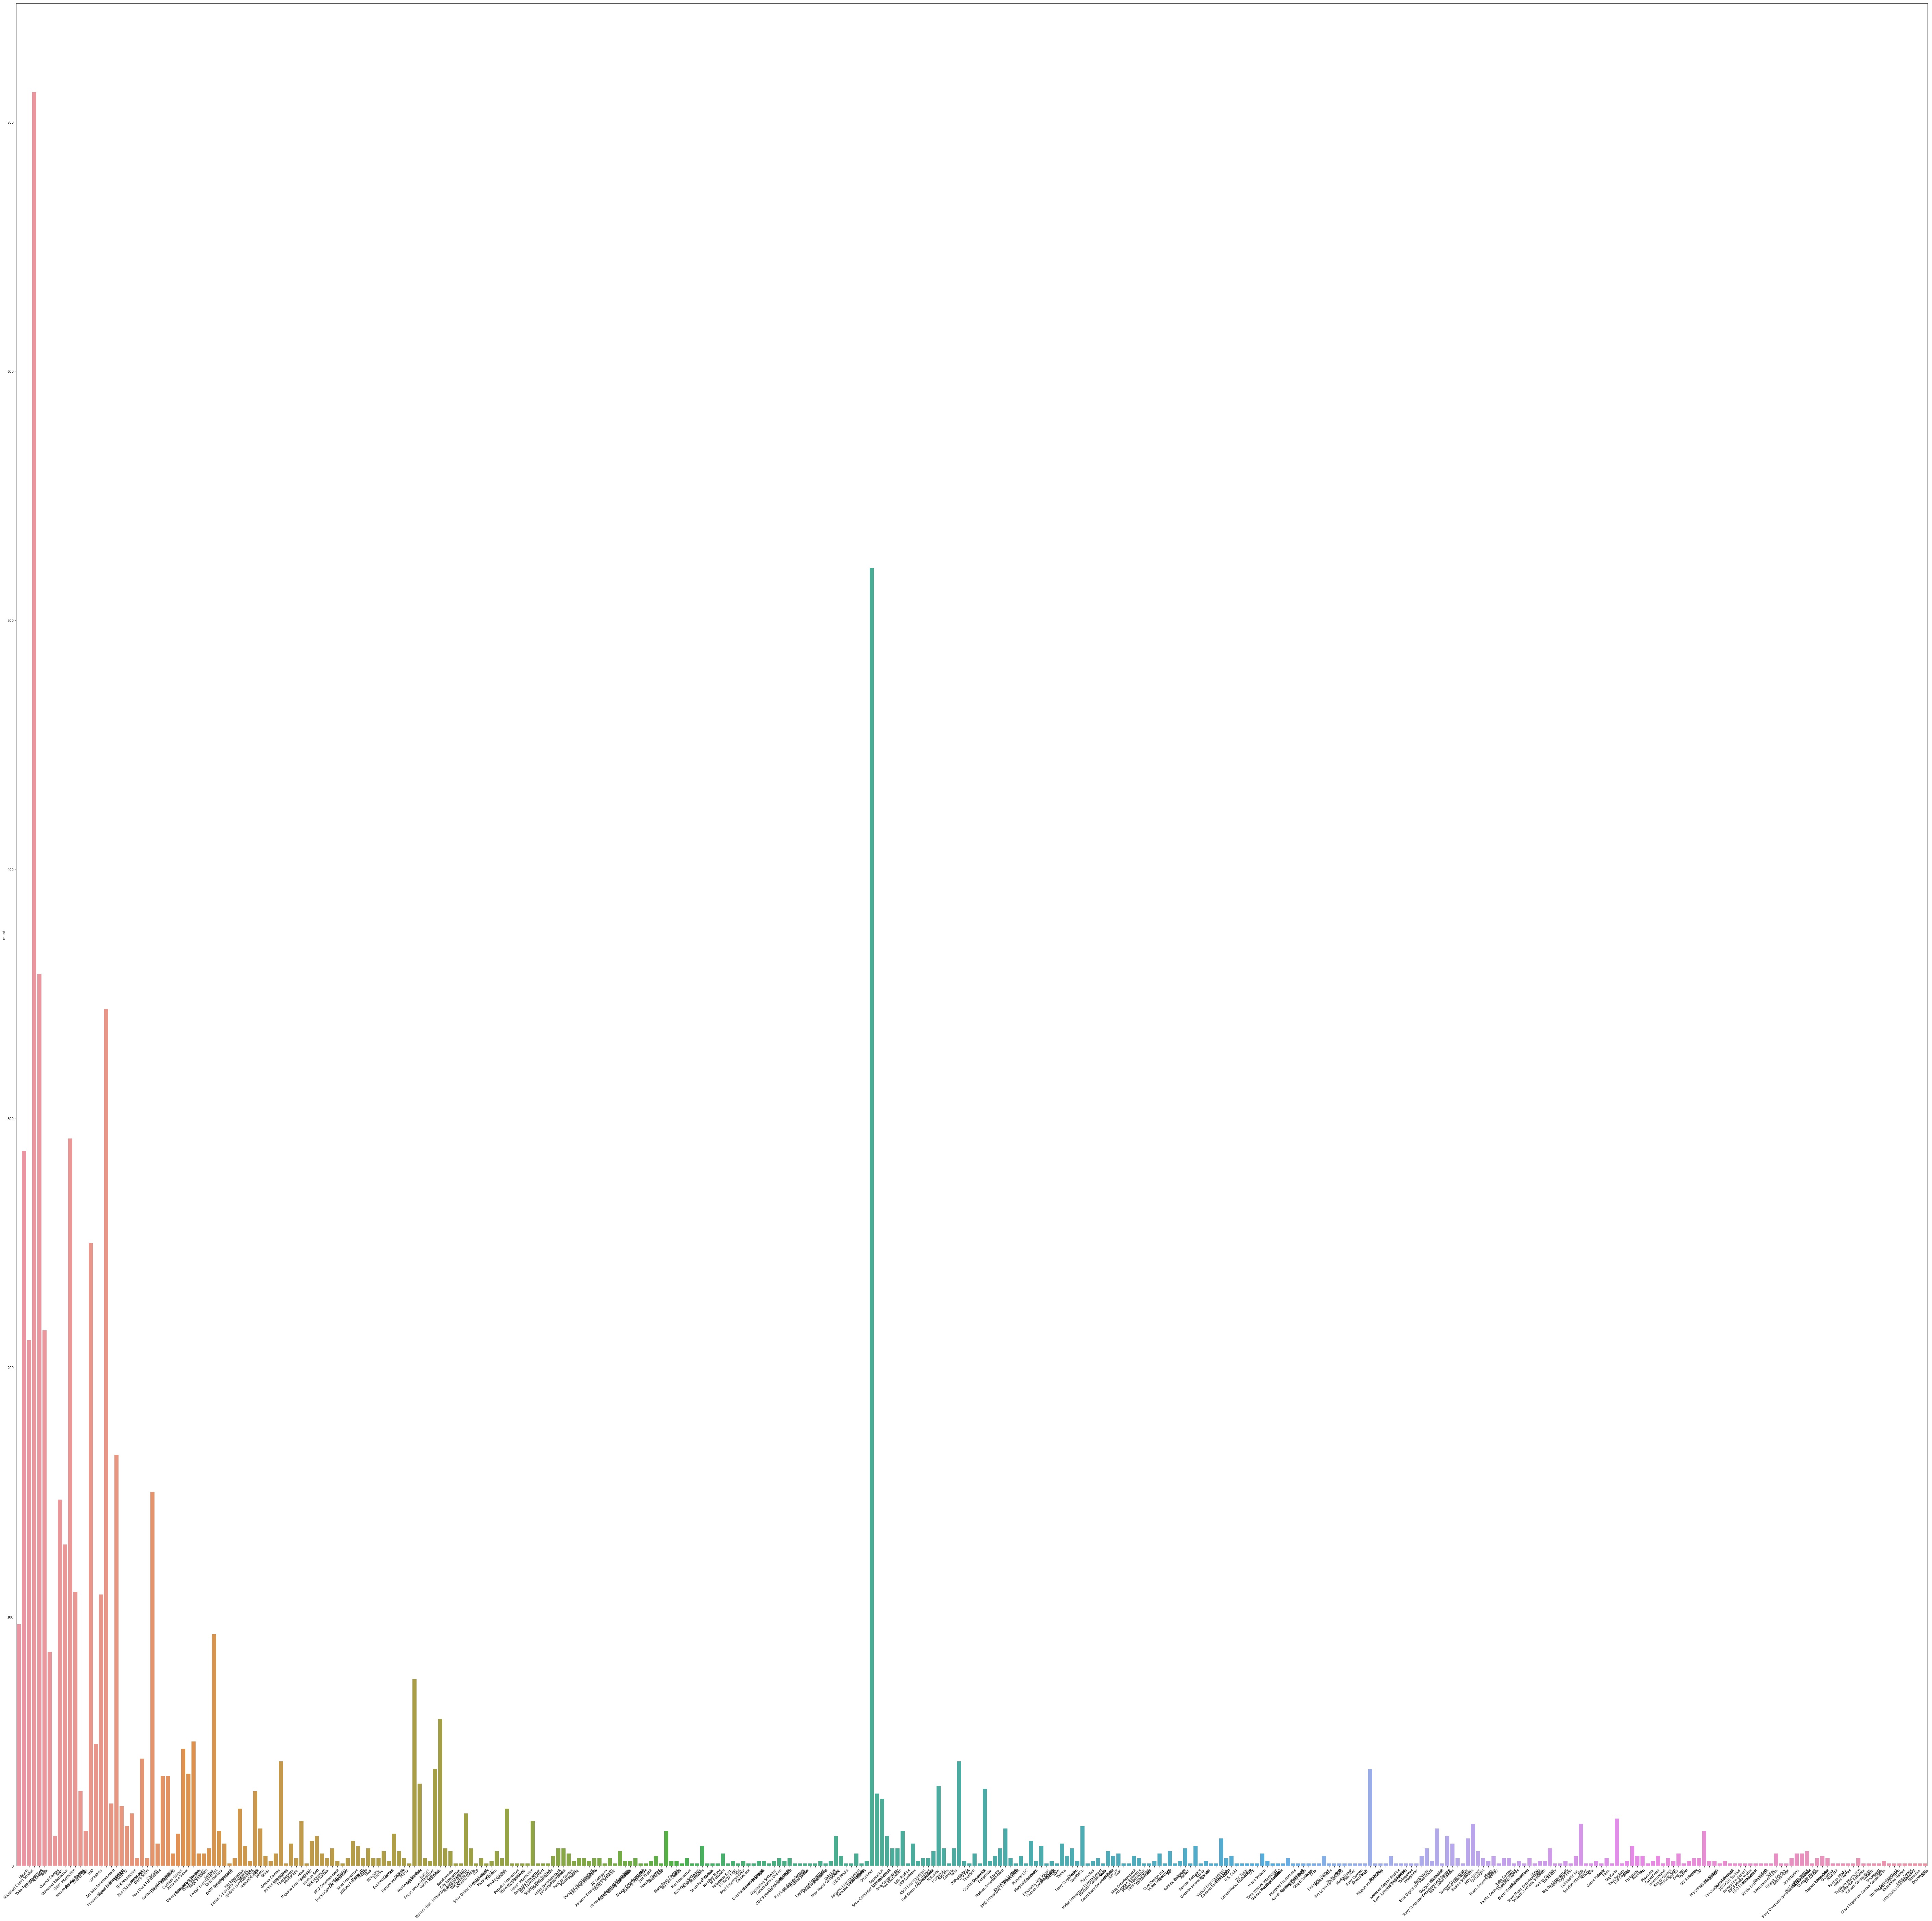

In [69]:
# display top 5 publishers
plt.figure(figsize=(100,100))
plt.xticks(rotation=45)
sns.countplot(publisher)

### Use regression
features = platform, genre, and publisher